# Predicting links in Social Networks

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import pickle

## Load data

### Like relation

In [2]:
like_1 = pd.read_csv("data/engineered_features/Like_Features_day_1.csv")
like_2 = pd.read_csv("data/engineered_features/Like_Features_day_2.csv")
like_3 = pd.read_csv("data/engineered_features/Like_Features_day_3.csv")
like_4 = pd.read_csv("data/engineered_features/Like_Features_day_4.csv")
like_5 = pd.read_csv("data/engineered_features/Like_Features_day_5.csv")

In [3]:
common_1 = pd.read_csv("data/engineered_features/common_interest_day_1.csv")
common_2 = pd.read_csv("data/engineered_features/common_interest_day_2.csv")
common_3 = pd.read_csv("data/engineered_features/common_interest_day_3.csv")
common_3 = pd.read_csv("data/engineered_features/common_interest_day_4.csv")
common_1_3 = pd.read_csv("data/engineered_features/common_interest_combined_day_1_3.csv")

### Posting TFIDF

In [7]:
with open("data/engineered_features/postings_tfidf_and_graph_features_only_positive_days_1to3.pkl","rb") as input_file:
    tfidf_pos_1_3 = pickle.load(input_file)

with open("data/engineered_features/postings_tfidf_and_graph_features_only_positive_day_4_test.pkl", "rb") as input_file:
    tfidf_pos_4_test = pickle.load(input_file)

with open("data/engineered_features/postings_tfidf_and_graph_features_only_negative_days_1to3.pkl", "rb") as input_file:
    tfidf_neg_1_3 = pickle.load(input_file)

with open("data/engineered_features/postings_tfidf_and_graph_features_only_negative_day_4_test.pkl", "rb") as input_file:
    tfidf_neg_4_test = pickle.load(input_file)

## Define columns for training

In [ ]:
print("")
target = "label"
columns = [
    "cn", "pa", "tn", # graph features
    "minTriangles", "maxTriangles", "minCoefficient", "maxCoefficient", # triangle features
    "sp", "sl" # community features
]

X = df[columns]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

array([[<AxesSubplot:title={'center':'ID_Posting'}>,
        <AxesSubplot:title={'center':'ID_Posting_Parent'}>,
        <AxesSubplot:title={'center':'ID_CommunityIdentity'}>],
       [<AxesSubplot:title={'center':'PostingCreatedAt'}>,
        <AxesSubplot:title={'center':'ID_Article'}>,
        <AxesSubplot:title={'center':'ArticlePublishingDate'}>],
       [<AxesSubplot:title={'center':'UserCreatedAt'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

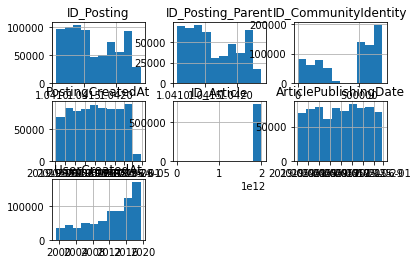

In [6]:
df.hist()

In [ ]:
df['PostingCreatedAt'].hist()

In [ ]:
rfc = classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

## Define evaluation function

In [ ]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall"],
        "Score": [accuracy_score(actual, predictions),
                  precision_score(actual, predictions),
                  recall_score(actual, predictions)]
    })

## Evaluate prediction

In [ ]:
predictions = classifier.predict(X_train)
evaluate_model(predictions, y_test)

# TODO

- Add engineered features
- Split according to days (one day for test one for verfication?)
- More models
- Grid search for params
- Cross validtation
- Explainability?


See this [repo](https://github.com/neo4j-examples/link-prediction) for reference